# Implementing a Linear Regression problem with Python

Now, we are ready to implement our own linear regression example. 

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

Nota that, the cost funtion is just the sum of all the square errors from our hypothesis ($\hat{y}_i$) versus the data ($y_i$).

The best parameters for our hypothesis will give us the **minimum cost function**.

## Finding a minimum for J

Finding a minimum of a function is equivalent to finding the parameters that make the gradient of that function to vanish. In other words:

$$\nabla_{\theta} J(\theta) = 0$$

We will implement two ways of solving this problem.

### A) Gradient descent (Numerical method)


From a starting point ($\theta$), we will try to move to a new point $\theta '$, decreasing the cost funtion ($J(\theta)$). We will do this many times, up to we find a minimum (or close enough to it).

#### Partial differentials of the cost function (using chain rule)

$$\frac{\partial J}{\partial\theta_0} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial J}{\partial\theta_1} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

Finally, we need to update iteratively the values for $\theta_0$ and $\theta_1$. Using Gradient Descent algorithm  with learning rate ($\alpha$) until convergence criterion ($\epsilon$) is achieved:

         while (convergence==False):
$$\theta_0' = \theta_0 - \alpha \frac{\partial J}{\partial\theta_0} $$
$$\theta_1' = \theta_1 - \alpha \frac{\partial J}{\partial\theta_1} $$
$$J' = J(\theta_0',\theta_1')$$
$$\Delta J = abs(J'-J)$$
$$ convergence = (\Delta J < \epsilon)$$

### B) Normal equations (Algebra)

In matrix notation, we can implement our hypothesis as:

$$h_\theta (x^{(i)})=(x^{(i)})^T \theta$$

Note that, in this case, if we want to consider our hypothesis such $h(\theta) = \theta_0 + \theta_i x^{(i)}$ where $x$ is a vector, for consistency, we need to introduce an additional "constant feature" in our data. In other words, we need to map our input data as follows:

$$x_i \rightarrow [1,x_i]$$

we can express gradient of J as follows:

$$\nabla_{\theta} J(\theta) = X^T X \theta - X^T \vec{y}$$

To minimize J, we set its derivatives to zero, therefore obtaining the **normal equations**:

$$ X^T X \theta = X^T \vec{y}$$

We can solve this equation for theta.

As a final remark, we can extend this method to non linear hypothesis by extending our input data $x$ to the features we need. For example, for a parabolic fit:

$$x_i \rightarrow [1,x_i,x_i^2]$$

### TEST A)  Implementación de --- Gradient descent (Numerical method)


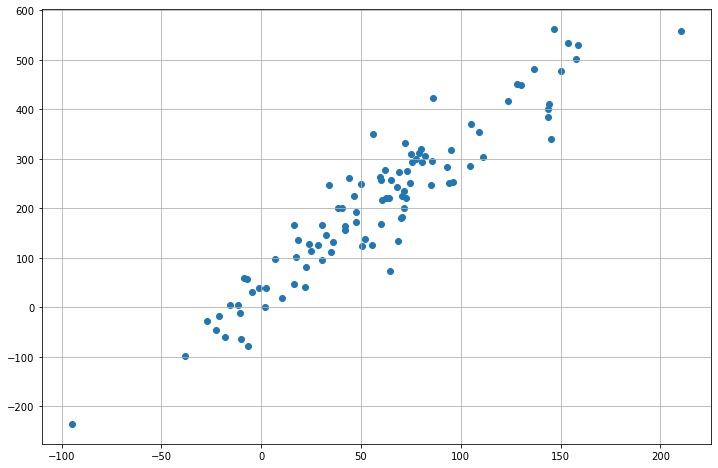

In [44]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


theta_0 = np.max([11,7,3,31])
theta_1 = np.min([11,7,3,31])

X = (np.random.randn(100) + 1) * 50
#X=np.linspace(-50,150,100)
jitter = 50 * np.random.randn(100)
y = theta_0 + theta_1 * X + jitter

fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(X,5*X,'g-')
ax.scatter(X, y)
ax.grid(True)


In [45]:
theta_1

3

In [43]:
alpha=0.00003
epsilon=10000

theta_0 = 0
theta_1 = 1

n=len(X)

f_cost=np.sum((theta_0 + theta_1 * X - y)**2) * (1/n)

lista_f_cost=[f_cost]




for i in range(5):

    deriv_theta_0 = np.sum((theta_0 + theta_1 * X - y)) * (2/n)
    deriv_theta_1 = np.sum((theta_0 + theta_1 * X - y) * X) * (2/n)

    theta_0_new=theta_0 - alpha * deriv_theta_0
    theta_1_new=theta_1 - alpha * deriv_theta_1

    f_cost_new=np.sum((theta_0_new + theta_1_new * X - y)**2) * (1/n)

    #print(theta_0_new, theta_1_new)
    #print(f_cost_new, f_cost)
    delta_err = f_cost_new - f_cost

    lista_f_cost.append(f_cost_new)

   
    print (f_cost_new ,f_cost , delta_err)
    
    if np.abs(delta_err) < epsilon:
        print(theta_0, theta_1)
        print(f_cost)
        print (i)
        break
    
    theta_0=theta_0_new
    theta_1=theta_1_new
    f_cost_new=f_cost
    
print (lista_f_cost)




15700.321190326338 28881.78386003824 -13181.4626697119
9272.637492969616 28881.78386003824 -19609.14636706862
6138.294061479245 28881.78386003824 -22743.489798558992
4609.879718732887 28881.78386003824 -24271.90414130535
3864.563395554753 28881.78386003824 -25017.220464483486
[28881.78386003824, 15700.321190326338, 9272.637492969616, 6138.294061479245, 4609.879718732887, 3864.563395554753]
